<a href="https://colab.research.google.com/github/KruthiPenjarla/bubblicious/blob/main/1_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

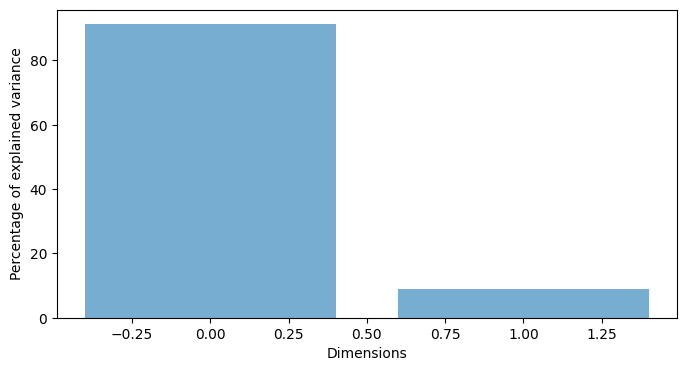

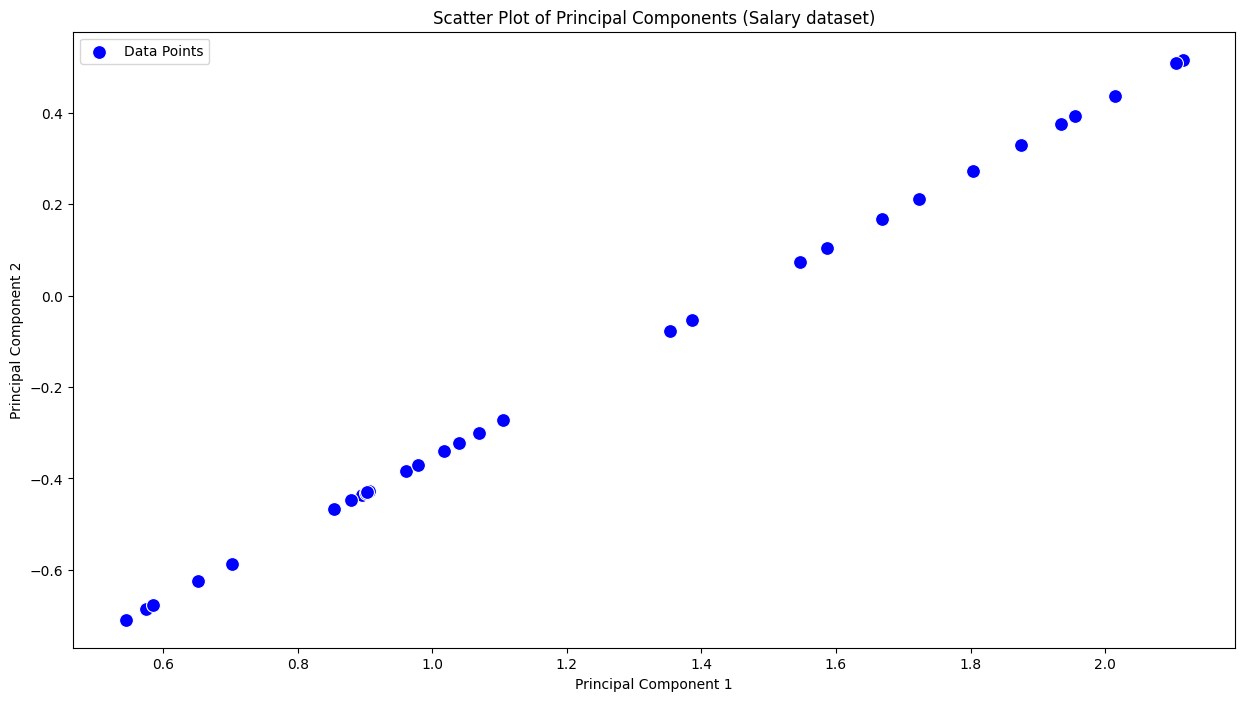

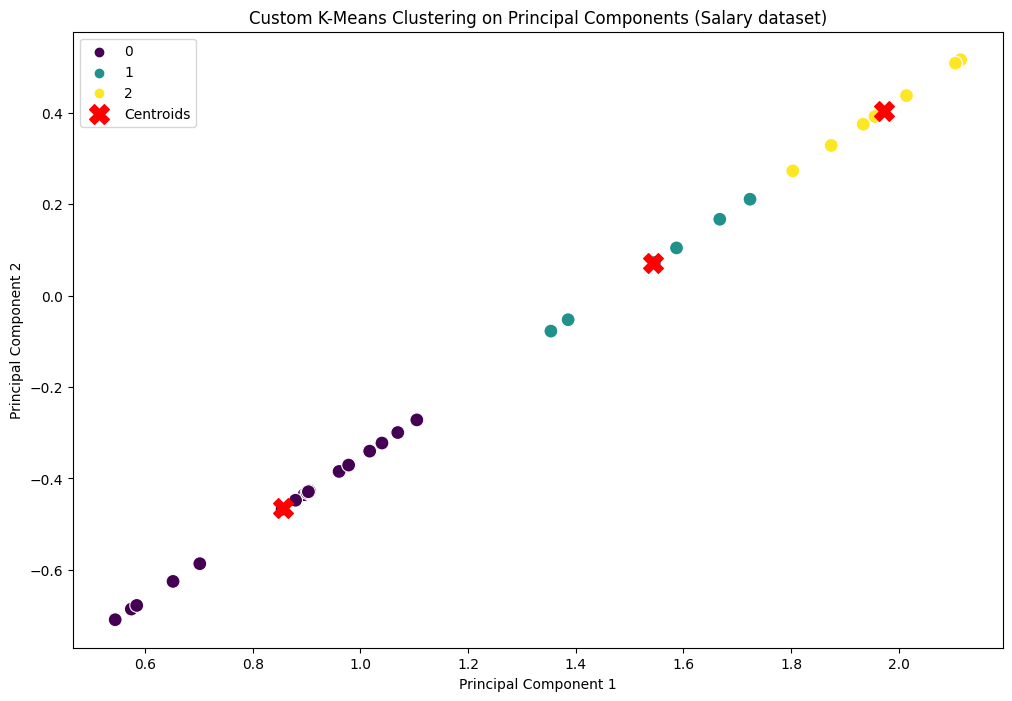

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Custom K-Means implementation
def custom_kmeans(data, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = data.sample(n=k).values

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of the points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Load the Salary dataset
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.describe

# Extract features (Yearsofexperience and Salary)
X_salary = salary_data[['YearsExperience', 'Salary']].values

# Standardize the data
X_salary = (X_salary - X_salary.mean()) / X_salary.std(ddof=0)

# Calculate the correlation matrix of the data
X_corr_salary = (1 / X_salary.shape[0]) * X_salary.T.dot(X_salary)

# Perform PCA
u_salary, s_salary, v_salary = np.linalg.svd(X_corr_salary)
eig_values_salary, eig_vectors_salary = s_salary, u_salary

# Plotting the variance explained by each PC
explained_variance_salary = (eig_values_salary / np.sum(eig_values_salary)) * 100
plt.figure(figsize=(8, 4))
plt.bar(range(X_salary.shape[1]), explained_variance_salary, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

# Calculate principal components for Salary dataset
pc1_salary = X_salary.dot(eig_vectors_salary[:, 0])
pc2_salary = X_salary.dot(eig_vectors_salary[:, 1])

# Plotting in 2D for Salary dataset
plt.figure(figsize=(15, 8))
sns.scatterplot(x=pc1_salary, y=pc2_salary, s=100, color='blue', label='Data Points')
plt.title('Scatter Plot of Principal Components (Salary dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Apply custom K-Means clustering on the extracted features
pca_df_salary = pd.DataFrame({'PC1': pc1_salary, 'PC2': pc2_salary})
n_clusters_salary = 3  # You can adjust the number of clusters
custom_labels_salary, custom_centroids_salary = custom_kmeans(pca_df_salary, n_clusters_salary)

# Visualize the clustered data in the principal component space for Salary dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue=custom_labels_salary, palette='viridis', data=pca_df_salary, s=100)
plt.scatter(custom_centroids_salary[:, 0], custom_centroids_salary[:, 1], marker='X', s=200, color='red',
            label='Centroids')
plt.title('Custom K-Means Clustering on Principal Components (Salary dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
